Khanh Nghiem  
Last updated: 01/04/19  
Bellman-Ford Shortest Path algorithm  
**Input**: connected and directed graph G with no negative cycles, start vertex s, destination vertex t  
**Output**: the shortest path from s to t

## Bellman-Ford Algorithm

- Let n = |V|
- Initialize a 2-D array OPT (v in V) * (0-> n-1)
- Set OPT\[0,t\] = 0
- for all v != t:
    OPT\[0,v\] = infinity
- for all i = 1...n-1:
    + for v in V:
        - OPT\[i,v\] = min(c(v,w) + OPT\[i-1, w\]), for w in S = all nodes where vw is an edge

In [7]:
def print_graph(G):
    for n, nbrs in G.adj.items():
        for nbr, eattr in nbrs.items():
            wt = eattr['weight']
            print('(%d, %d, %.3f)' % (n, nbr, wt))

In [8]:
import networkx as nx

test_graph_1 = [(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]

G = nx.DiGraph()
G.add_weighted_edges_from(test_graph_1)
print_graph(G)

(1, 2, 0.125)
(1, 3, 0.750)
(2, 4, 1.200)
(3, 4, 0.375)


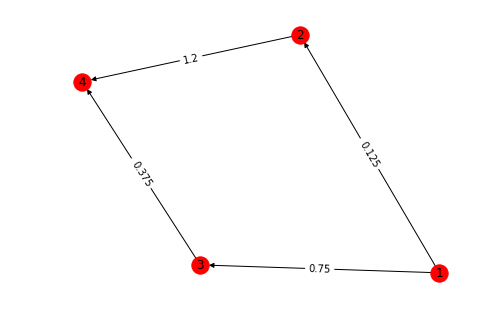

In [11]:
import matplotlib.pyplot as plt
weights = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels = True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=weights)
plt.draw()

In [10]:
from sys import maxsize as infinity

# a utility function to OPT(i, v) based on OPT(i-1, w) for w is an out neighbor of v
def find_min(G, OPT, v, i):
    V = list(G.nodes())
    # bench mark for comparison
    cur_min = OPT[i-1][V.index(v)]
    
    # loop through all out neighbors of v
    out_neighbors = list(G.successors(v))
    
    for w in out_neighbors:
        cur_min = min((OPT[i-1][V.index(w)] + G.edges[v,w]['weight']), cur_min)

    return cur_min
    

def bellman_ford(G, s, t):
    n = G.number_of_nodes()
    V = list(G.nodes())
    
    # 2-D array for memoization
    OPT = [[None]*n]*n
    
    # OPT(0, v) = infinity for all nodes except t
    for i in range(n):
        OPT[0][i] = infinity
    
    # set OPT(0, t) = 0
    OPT[0][V.index(t)] = 0
    
    for i in range(1,n):
        for v in V:
            OPT[i][V.index(v)] = find_min(G, OPT, v, i)
    
    return OPT[n-1][V.index(s)]

print(bellman_ford(G, 1, 4))

1.125
